In [1]:
# Wizualizacja sieci linii kolejowych łączących największe miasta w Polsce.
# Wybrano polskie miasta powyżej 100 tysięcy mieszkańców, a także ważniejsze węzły kolejowe między nimi
# i zwizualizowano linie kolejowe łączące je ze sobą.
# Wagi krawędzi odpowiadają temu, czy połączenie między miastami jest dwutorowe na całej długości, czy też nie.
# Wagi wierzchołków odpowiadają liczbie mieszkańców miast (podzielonej przez 10 000 i zaokrąglonej).
# Dane nt. siatki wzięte ze strony internetowej PKP PLK SA.

# Łącznie: 64 wierzchołki i 123 krawędzie.

In [2]:
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

In [3]:
# Wagi wierzchołków - liczba ludności miast (w dziesiątkach tysięcy)

nodes_values = dict(zip(["Warszawa", "Kraków", "Wrocław", "Łódź", "Poznań", "Gdańsk", "Szczecin", "Lublin", "Bydgoszcz", "Białystok", 
                         "Katowice", "Gdynia", "Częstochowa", "Radom", "Rzeszów", "Toruń", "Sosnowiec", "Kielce", "Gliwice", "Olsztyn",
                         "Bielsko-Biała", "Zabrze", "Bytom", "Zielona Góra", "Opole", "Gorzów", "Elbląg", "Płock", "Wałbrzych", "Tarnów",
                         "Tychy", "Koszalin", "Włocławek", "Kalisz",
                
                       "Chojnice", "Dęblin", "Grodzisk", "Iława", "Inowrocław", "Koluszki", "Koło", "Kostrzyn", "Krzyż", "Kutno", 
                       "Leszno", "Lubliniec", "Łowicz", "Łuków", "Malbork", "Miechów", "Nw.Dw.Maz.", "Opoczno", "Ostrów Wlkp.", "Piła", 
                       "Siedlce", "Sierpc", "Stalowa Wola", "Stargard", "Szczecinek",  "Tczew", "Włoszczowa", "Zawiercie", "Zbąszyń", "Zd. Wola",
                        
                       "1 mln", "100 tys.", "10 tys."], 
                        [185, 80, 67, 65, 55, 49, 40, 34, 33, 30,
                         29, 25, 22, 21, 20, 20, 20, 20, 18, 18,
                         17, 17, 16, 15, 13, 13, 12, 12, 11, 11,
                         11, 11, 11, 10,
                        
                        4, 2, 2, 4, 7, 2, 3, 2, 1, 4,
                        6, 3, 3, 3, 4, 2, 3, 2, 7, 7,
                        7, 2, 6, 6, 4, 6, 2, 5, 1, 4,
                        
                        100, 10, 1])) 

In [4]:
# Kodowanie przybliżonego położenia geograficznego miast

pos = dict(zip(["Warszawa", "Kraków", "Wrocław", "Łódź", "Poznań", "Gdańsk", "Szczecin", "Lublin", "Bydgoszcz", "Białystok", 
                "Katowice", "Gdynia", "Częstochowa", "Radom", "Rzeszów", "Toruń", "Sosnowiec", "Kielce", "Gliwice", "Olsztyn",
                "Bielsko-Biała", "Zabrze", "Zielona Góra", "Opole", "Gorzów", "Elbląg", "Płock", "Wałbrzych", "Tarnów", "Koszalin",
               "Włocławek", "Kalisz", "Bytom", "Tychy", 
               
               "Chojnice", "Dęblin", "Grodzisk", "Iława", "Inowrocław", "Koluszki", "Koło", "Kostrzyn", "Krzyż", "Kutno", 
               "Leszno", "Lubliniec", "Łowicz", "Łuków", "Malbork", "Miechów", "Nw.Dw.Maz.", "Opoczno", "Ostrów Wlkp.", "Piła", 
                "Siedlce", "Sierpc", "Stalowa Wola", "Stargard", "Szczecinek",  "Tczew", "Włoszczowa", "Zawiercie", "Zbąszyń", "Zd. Wola",
               
               "1 mln", "100 tys.", "10 tys."],
               [(21.1, 52), (20, 50.1), (17, 51), (19.5, 51.8), (17, 52.4), (18.5, 54.3), (14.5, 53.5), (22.5, 51.25), (18, 53), (23, 53), 
                (19, 50.1), (18.4, 54.5), (19.1, 50.8), (21, 51.4), (22, 50.1), (18.5, 53), (19.2, 50.4), (20.6, 50.8), (18.5, 50.1), (20.5, 53.8),
                (19, 49.8), (18.7, 50.2), (15.4, 52), (18, 50.7), (15.2, 52.8), (19.4, 54.1), (19.7, 52.6), (16.2, 50.8), (21, 50), (16.1, 54.1),
               (19, 52.6), (18, 51.8), (18.9, 50.3), (19, 49.95),
               
               (17.4, 53.7), (21.9, 51.6), (20.6, 51.9), (19.6, 53.6), (18.2, 52.8), (19.8, 51.7), (18.6, 52.2), (14.6, 52.6), (16, 52.9), (19.3, 52.2),
               (16.6, 51.8), (18.6, 50.7), (19.9, 52.1), (22.4, 51.9), (19, 54), (20, 50.4), (20.7, 52.4), (20.3, 51.4), (17.8, 51.6), (16.7, 53.1), 
                (22.3, 52.1), (19.6, 52.9), (22.1, 50.6), (15, 53.3), (16.6, 53.6), (18.8, 54.1), (20, 50.9), (19.4, 50.5), (15.8, 52.2), (18.9, 51.6),
               
               (22.8, 54.4), (22.8, 54.1), (22.8, 53.9)]))


In [5]:
edgelist_df = pd.DataFrame({
    "source": ["Warszawa", "Grodzisk", "Włoszczowa", "Zawiercie", "Sosnowiec", "Katowice", "Zabrze", "Gliwice", "Opole", "Wrocław",
              "Leszno", "Poznań", "Inowrocław", "Inowrocław", "Toruń", "Toruń", "Toruń", "Nw.Dw.Maz.", "Nw.Dw.Maz.", "Nw.Dw.Maz.",
              "Białystok", "Białystok", "Siedlce", "Siedlce", "Siedlce", "Dęblin", "Dęblin", "Dęblin", "Dęblin", "Łuków",
              "Stalowa Wola", "Stalowa Wola", "Stalowa Wola", "Tarnów", "Tarnów", "Iława", "Tczew", "Tczew", "Tczew", "Tczew",
              "Gdynia", "Gdynia", "Gdynia", "Szczecin", "Szczecin", "Szczecin", "Gorzów", "Gorzów", "Gorzów", "Zbąszyń",
              "Zbąszyń", "Zielona Góra", "Piła", "Piła", "Piła", "Piła", "Piła", "Piła", "Koszalin", "Koszalin",
              "Krzyż", "Krzyż", "Zielona Góra", "Zielona Góra", "Kostrzyn", "Zbąszyń", "Poznań", "Koło", "Kutno", "Łowicz",
              "Łódź", "Łódź", "Łódź", "Łódź", "Warszawa", "Wałbrzych", "Wałbrzych", "Bielsko-Biała", "Bielsko-Biała", "Katowice",
              "Kraków", "Gliwice", "Lubliniec", "Lubliniec", "Lubliniec", "Ostrów Wlkp.", "Ostrów Wlkp.", "Szczecinek", "Szczecinek", "Bydgoszcz",
              "Inowrocław", "Koło", "Zd. Wola", "Zd. Wola", "Częstochowa", "Włoszczowa", "Włoszczowa", "Częstochowa", "Częstochowa", "Kutno",
              "Sierpc", "Iława", "Ostrów Wlkp.", "Ostrów Wlkp.", "Ostrów Wlkp.", "Ostrów Wlkp.", "Zd. Wola", "Miechów", "Miechów", "Miechów",
              "Kielce", "Radom", "Malbork", "Elbląg", "Kraków", "Kraków", "Opoczno", "Opoczno", "Opoczno", "Grodzisk",
              "Bydgoszcz", "Włocławek", "Zielona Góra",
              
              "1 mln", "100 tys."], #2 ostatnie na potrzeby legendy,
    "target": ["Grodzisk", "Opoczno", "Zawiercie", "Sosnowiec", "Katowice", "Zabrze", "Gliwice", "Opole", "Wrocław", "Leszno",
              "Poznań", "Inowrocław", "Bydgoszcz", "Toruń", "Włocławek", "Sierpc", "Iława", "Iława", "Sierpc", "Warszawa",
              "Warszawa", "Olsztyn", "Warszawa", "Białystok", "Łuków", "Łuków", "Warszawa", "Lublin", "Radom", "Lublin",
              "Lublin", "Kielce", "Rzeszów", "Rzeszów", "Kraków", "Malbork", "Malbork", "Gdańsk", "Chojnice", "Bydgoszcz",
              "Chojnice", "Gdańsk", "Koszalin", "Koszalin", "Stargard", "Kostrzyn", "Kostrzyn", "Krzyż", "Zbąszyń", "Leszno",
              "Zielona Góra", "Kostrzyn", "Poznań", "Krzyż", "Stargard", "Szczecinek", "Chojnice", "Bydgoszcz", "Stargard", "Szczecinek",
              "Stargard", "Poznań", "Leszno", "Wrocław", "Zbąszyń", "Poznań", "Koło", "Kutno", "Łowicz", "Koluszki",
              "Koluszki", "Kutno", "Zd. Wola", "Łowicz", "Łowicz", "Wrocław", "Opole", "Gliwice", "Tychy", "Tychy",
              "Bielsko-Biała", "Bytom", "Bytom", "Opole", "Częstochowa", "Leszno", "Lubliniec", "Stargard", "Chojnice", "Toruń",
              "Koło", "Zd. Wola", "Lubliniec", "Częstochowa", "Włoszczowa", "Kielce", "Miechów", "Zawiercie", "Koluszki", "Płock",
              "Płock", "Olsztyn", "Poznań", "Lubliniec", "Wrocław", "Kalisz", "Kalisz", "Kraków", "Sosnowiec", "Kielce",
              "Radom", "Warszawa", "Elbląg", "Olsztyn", "Sosnowiec", "Katowice", "Włoszczowa", "Radom", "Koluszki", "Koluszki",
              "Chojnice", "Kutno", "Wałbrzych",
              
              "100 tys.", "10 tys."],
    "weight": [2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
               2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
               2, 1, 2, 1, 2, 2, 2, 2, 2, 1,
               1, 2, 1, 2, 2, 2, 2, 2, 1, 2,
               1, 2, 1, 1, 2, 2, 2, 2, 1, 1,
               1, 2, 1, 2, 1, 1, 1, 2, 1, 1,
               2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
               2, 1, 2, 1, 2, 2, 1, 2, 2, 2,
               1, 1, 2, 1, 2, 2, 2, 2, 1, 2,
               2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
               1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
               2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
               1, 2, 1,
               
               2, 1] # Wagi mówią, czy połączenie jest jedno- czy dwutorowe
    
})
edgelist_df

,source,target,weight
0,Warszawa,Grodzisk,2
1,Grodzisk,Opoczno,2
2,Włoszczowa,Zawiercie,2
3,Zawiercie,Sosnowiec,2
4,Sosnowiec,Katowice,2
...,...,...,...
120,Bydgoszcz,Chojnice,1
121,Włocławek,Kutno,2
122,Zielona Góra,Wałbrzych,1
123,1 mln,100 tys.,2


In [6]:
graph = nx.from_pandas_edgelist(edgelist_df, edge_attr=True)  # twoRzeszównie grafu z listy krawędzi (są też inne metody)
nx.set_node_attributes(graph, nodes_values, "value")  # aktualizacja atrybutów wierzchołków

In [7]:
kolory = ["gold"]

for i in range(0, 63):
    kolory.append("salmon")
    
kolory.append("gold")
kolory.append("salmon")
kolory.append("salmon")

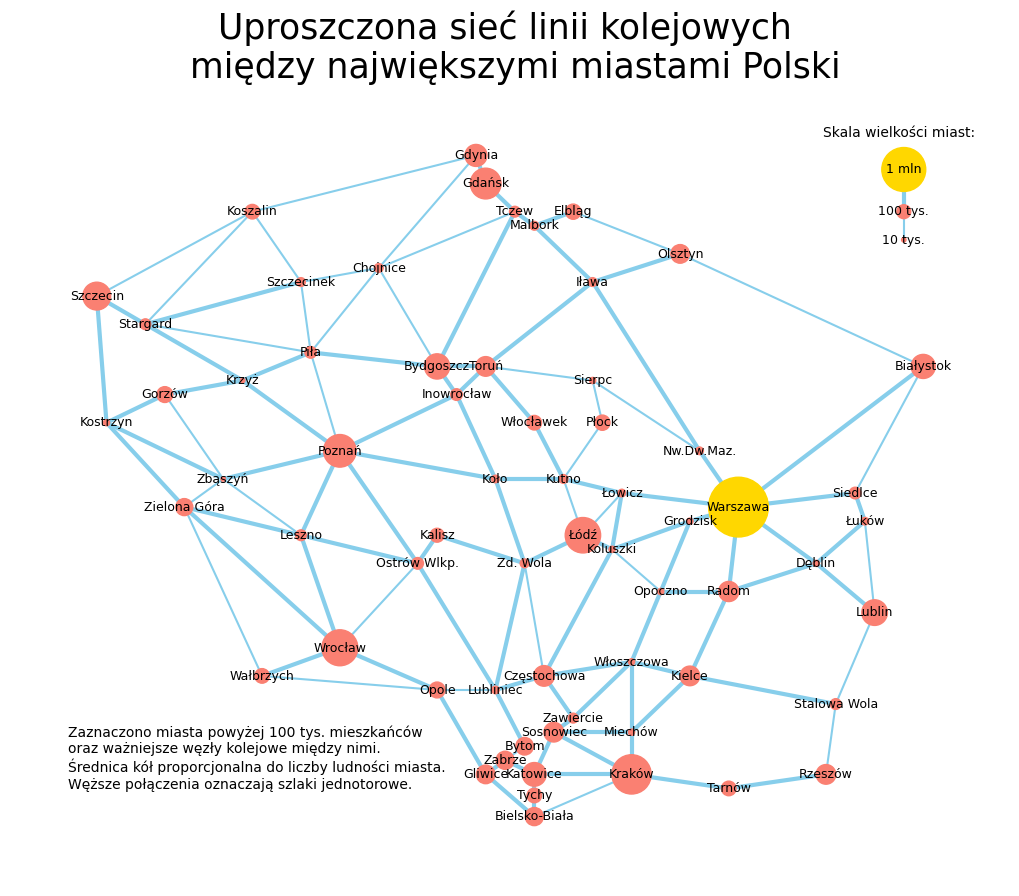

In [8]:
fig = plt.figure(figsize=(10, 8))

nx.draw(
    graph,
    pos = pos,
    with_labels=True,
    font_size = 9,
    node_color=kolory,
    edge_color="skyblue",
    node_size=[v[1]["value"] * 10 for v in graph.nodes(data=True)],
    width=[e[2]["weight"] * 1.5 for e in graph.edges(data=True)],
)
plt.title("Uproszczona sieć linii kolejowych \n między największymi miastami Polski", size = 25)
plt.text(14.2, 50, "Zaznaczono miasta powyżej 100 tys. mieszkańców \noraz ważniejsze węzły kolejowe między nimi. \nŚrednica kół proporcjonalna do liczby ludności miasta. \nWęższe połączenia oznaczają szlaki jednotorowe.")
plt.text(21.97, 54.63, "Skala wielkości miast:")


fig.savefig('KrolMateusz_graf.png', bbox_inches='tight')